# How to Fix an Imbalanced Dataset

- [Article](https://towardsdatascience.com/having-an-imbalanced-dataset-here-is-how-you-can-solve-it-1640568947eb)
- [Credit Card Fraud Prediction with XGBoost](https://github.com/wmlba/innovate2019/blob/master/Credit_Card_Fraud_Detection.ipynb)
- [Credit Card Fraud Prediction - Kaggle Kernel](https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets)

### 1. Resampling

- Oversampling
    - SMOTE
- Undersampling

### 2. Ensembling Methods

- BalancedBaggingClassifier

![resampling](img/resampling.png)

## Demo

In [1]:
from imblearn.over_sampling import SMOTE
from io import BytesIO
from matplotlib import pyplot as plt
from urllib import request
from zipfile import ZipFile
import pandas as pd
import seaborn as sns

In [3]:
# download data
r = request.urlopen("https://github.com/wmlba/innovate2019/raw/master/creditcardfraud.zip").read()
file = ZipFile(BytesIO(r))

In [4]:
creditcard_csv = file.open("creditcard.csv")
credit_df = pd.read_csv(creditcard_csv)
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


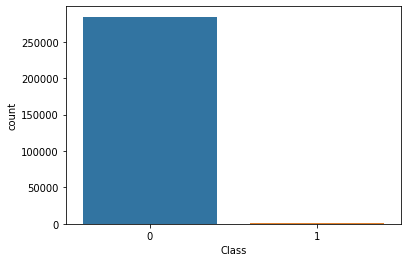

In [5]:
sns.countplot('Class', data=credit_df)
plt.show()

### Undersampling

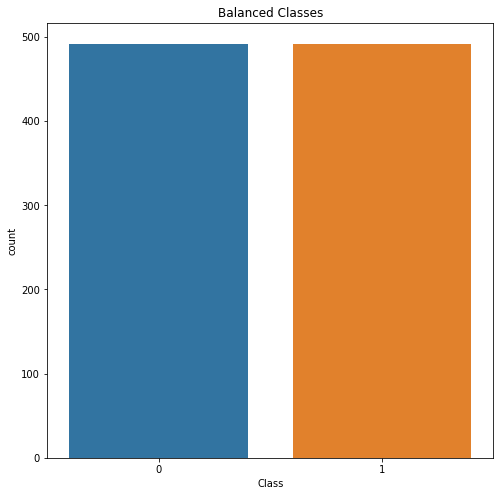

In [6]:
# Shuffle the Dataset.
shuffled_df = credit_df.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
fraud_df = shuffled_df.loc[shuffled_df['Class'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
non_fraud_df = shuffled_df.loc[shuffled_df['Class'] == 0].sample(n=492,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([fraud_df, non_fraud_df])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('Class', data=normalized_df)
plt.title('Balanced Classes')
plt.show()

### Oversampling - SMOTE

In [7]:
# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='minority', random_state=7)

# Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = sm.fit_sample(credit_df.drop('Class', axis=1), credit_df['Class'])
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainX),  pd.DataFrame(oversampled_trainY)], axis=1)

oversampled_train.columns = credit_df.columns
oversampled_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Plot

**Before Resampling:**

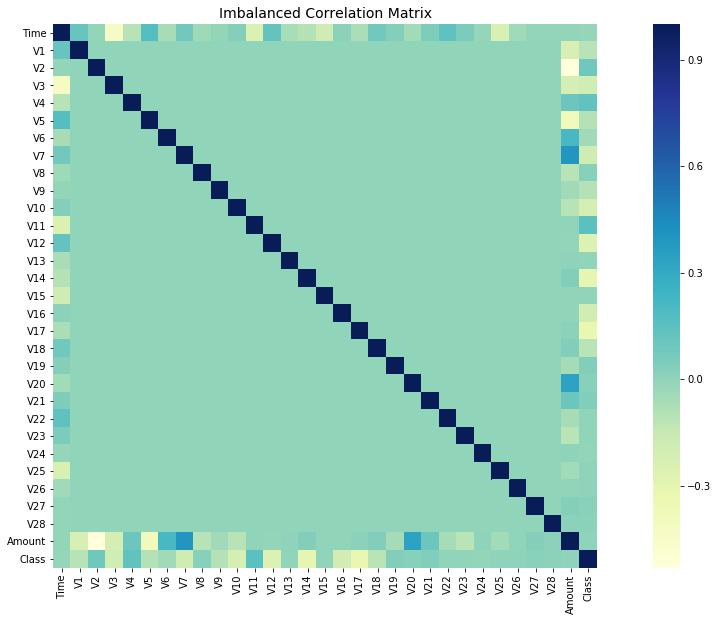

In [8]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(20,10))         
# Imbalanced DataFrame Correlation
corr = credit_df.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)
ax.set(adjustable='box', aspect='equal')
plt.show()

**After Resampling:**

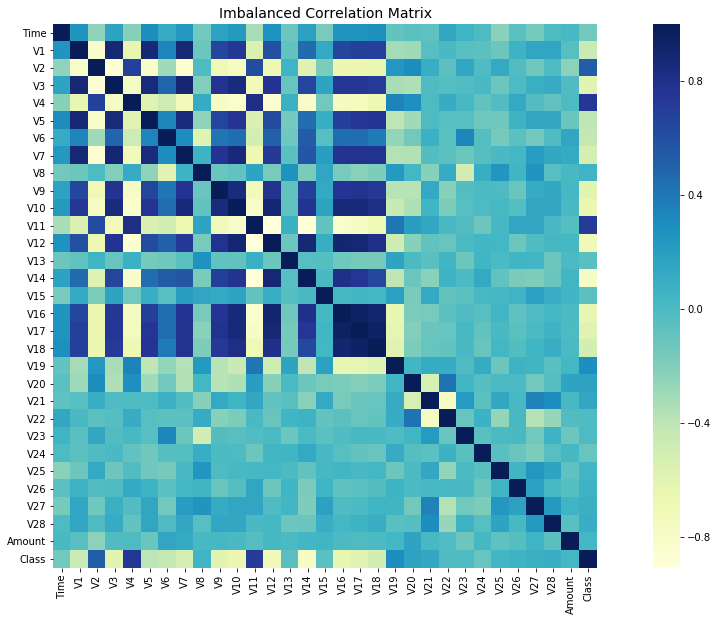

In [9]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(20,10))         
# Imbalanced DataFrame Correlation
corr = oversampled_train.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)
ax.set(adjustable='box', aspect='equal')
plt.show()

Notice that the feature correlation is much more obvious now. Before fixing the imbalance problem, most of the features did not show any correlation to Y which would definitely have impacted the performance of the model. Since the feature correlation really matters to the overall model’s performance, it is important to fix the imbalance as it will also impact the ML model performance.

### Ensemble methods - BalancedBaggingClassifier

We can use `BalancedBaggingClassifier` from `imblearn` library. It allows the resampling of each subset of the dataset before training each estimator of the ensemble.

In [10]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Create an object of the classifier.
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)

y_train = credit_df['Class']
X_train = credit_df.drop(['Class'], axis=1, inplace=False)

# Train the classifier.
bbc.fit(X_train, y_train)
preds = bbc.predict(X_train)